# Set up 

In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

from itertools import combinations 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import precision_score, recall_score, f1_score

# Import and clean data

In [18]:
# load datasets 
accidents_2019 = pd.read_csv('../../data/accidents_Berlin_2019.csv', encoding ="cp1252", sep = ";")
accidents_2021 = pd.read_csv('../../data/accidents_Berlin_2021.csv', encoding ="cp1252", sep = ";")

accidents_2019.head()

,OBJECTID,LAND,BEZ,LOR,STRASSE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,USTRZUSTAND,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
0,49090,11,12,12301203,Wittenau Süd,2019,1,13,6,3,...,1,0,0,0,0,1,"794062,2837","5835083,823","13,34146","52,58609"
1,49091,11,3,3040818,Pankow Süd,2019,1,9,5,3,...,1,0,0,0,0,0,"799130,4007","5832327,415","13,41356","52,55862"
2,49093,11,12,12103115,Breitkopfbecken,2019,3,21,6,3,...,0,0,0,0,0,0,"795437,613","5833549,454","13,36034","52,57159"
3,49096,11,6,6040703,Nikolassee,2019,1,7,6,2,...,1,1,0,0,0,1,"786714,3754","5817042,137","13,21777","52,42825"
4,49097,11,7,7030303,Grazer Platz,2019,2,15,3,3,...,1,0,0,0,0,0,"796074,3342","5822724,905","13,36007","52,47421"


In [19]:
# Dictionary mapping German column names to English
translation_dict = {
    'OBJECTID': 'ObjectID',
    'LAND': 'State',
    'BEZ': 'District',
    'LOR': 'LOR',
    'STRASSE': 'Street',
    'UJAHR': 'AccidentYear',
    'UMONAT': 'AccidentMonth',
    'USTUNDE': 'AccidentHour',
    'UWOCHENTAG': 'DayOfWeek',
    'UKATEGORIE': 'AccidentCategory',
    'UART': 'AccidentType',
    'UTYP1': 'AccidentTypeDetail',
    'ULICHTVERH': 'LightingCondition',
    'IstRad': 'InvolvingBike',
    'IstPKW': 'InvolvingCar',
    'IstFuss': 'InvolvingPedestrian',
    'IstKrad': 'InvolvingMotorcycle',
    'IstGkfz': 'InvolvingHGV',
    'IstSonstige': 'InvolvingOther',
    'USTRZUSTAND': 'RoadCondition',
    'LINREFX': 'GraphicCoord1',
    'LINREFY': 'GraphicCoord2',
    'XGCSWGS84': 'LongitudeWGS84',
    'YGCSWGS84': 'LatitudeWGS84'
}

# Rename the columns
df_accidents_2019 = accidents_2019.rename(columns=translation_dict)
df_accidents_2021 = accidents_2021.rename(columns=translation_dict)

In [20]:
df_accidents_2021.head()

,ObjectID,State,District,LOR_ab_2021,AccidentYear,AccidentMonth,AccidentHour,DayOfWeek,AccidentCategory,AccidentType,...,InvolvingCar,InvolvingPedestrian,InvolvingMotorcycle,InvolvingHGV,InvolvingOther,RoadCondition,GraphicCoord1,GraphicCoord2,LongitudeWGS84,LatitudeWGS84
0,219249,11,3,3701658.0,2021,11,18,2,3,0,...,1,0,1,0,0,1,"800202,0742","5829640,204","13,42689483","52,53393955"
1,219248,11,7,7501134.0,2021,12,19,7,3,6,...,1,1,0,0,0,1,"798479,5317","5819049,219","13,39209027","52,43995086"
2,219247,11,4,4100101.0,2021,12,17,4,3,5,...,1,0,0,0,0,0,"793352,6128","5829680,195","13,32624193","52,53802784"
3,219246,11,4,4501041.0,2021,12,15,7,3,5,...,1,0,1,0,0,1,"792950,0395","5825362,081","13,31652064","52,49953417"
4,219243,11,11,11501339.0,2021,12,9,5,3,3,...,1,0,0,0,1,2,"807182,01","5825602,793","13,52575163","52,49386714"


In [21]:
print(df_accidents_2021.AccidentCategory.unique())
print(df_accidents_2021.AccidentCategory.isnull().sum())

[3 2 1]
0


In [22]:
df_accidents_2021["accident_outcome"] = df_accidents_2021["AccidentCategory"].apply(lambda x: 1 if x != 3 else 0) 

df_accidents_2021.accident_outcome.value_counts()

0    9582
1    1685
Name: accident_outcome, dtype: int64

In [23]:
df_accidents_2021.columns

Index(['ObjectID', 'State', 'District', 'LOR_ab_2021', 'AccidentYear',
       'AccidentMonth', 'AccidentHour', 'DayOfWeek', 'AccidentCategory',
       'AccidentType', 'AccidentTypeDetail', 'LightingCondition',
       'InvolvingBike', 'InvolvingCar', 'InvolvingPedestrian',
       'InvolvingMotorcycle', 'InvolvingHGV', 'InvolvingOther',
       'RoadCondition', 'GraphicCoord1', 'GraphicCoord2', 'LongitudeWGS84',
       'LatitudeWGS84', 'accident_outcome'],
      dtype='object')

In [24]:
df_cleaned = df_accidents_2021.drop(columns=["ObjectID", "State", "LOR_ab_2021", "AccidentYear", "AccidentCategory"], axis=1)
for col in df_cleaned.columns: 
    if df_cleaned[col].dtype == "object": 
        df_cleaned[col].replace({',': '.'}, regex=True, inplace=True)
        df_cleaned[col] = df_cleaned[col].astype("float64")

In [25]:
df_cleaned.columns

Index(['District', 'AccidentMonth', 'AccidentHour', 'DayOfWeek',
       'AccidentType', 'AccidentTypeDetail', 'LightingCondition',
       'InvolvingBike', 'InvolvingCar', 'InvolvingPedestrian',
       'InvolvingMotorcycle', 'InvolvingHGV', 'InvolvingOther',
       'RoadCondition', 'GraphicCoord1', 'GraphicCoord2', 'LongitudeWGS84',
       'LatitudeWGS84', 'accident_outcome'],
      dtype='object')

# Machine Learning model to understand the key variables that determine whether an accident will be fatal/serious or minor 

In [26]:
scaler = MinMaxScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

In [27]:
train, test = train_test_split(df_normalized, test_size=0.2, random_state=42) 

X_train = train.drop("accident_outcome", axis=1)
y_train = train["accident_outcome"] 
X_test = test.drop("accident_outcome", axis=1) 
y_test = test["accident_outcome"] 

train['accident_outcome'] = y_train
majority_class = train[train['accident_outcome'] == 0]
minority_class = train[train['accident_outcome'] == 1]

undersampled_majority = resample(majority_class,
                                 replace=False,  # sample without replacement
                                 n_samples=len(minority_class),  # match minority class
                                 random_state=42) 

undersampled_data = pd.concat([undersampled_majority, minority_class])

X_train_undersampled = undersampled_data.drop('accident_outcome', axis=1)
y_train_undersampled = undersampled_data['accident_outcome']

We can see that the model is fitting pretty poorly. We are using a test set here not for prediction, but to evaluate how well the model is fitting the data (and learning the underlying pattern) 

In [28]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest.fit(X_train_undersampled, y_train_undersampled)

predictions = random_forest.predict(X_test)

sensitivity = recall_score(y_test, predictions)
ppv = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"sensitivity: {sensitivity}")
print(f"Pos. Pred. Val.: {ppv}")
print(f"F1 score: {f1}")

sensitivity: 0.5666666666666667
Pos. Pred. Val.: 0.21496311907270813
F1 score: 0.3116883116883117


Despite poor model fit, we still look at the feature importance to try and understand what are the key variables that makes an accident fatal/serious 

In [29]:
feature_importances = random_forest.feature_importances_

df_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
df_importances = df_importances.sort_values(by='Importance', ascending=False)

df_importances

,Feature,Importance
16,LongitudeWGS84,0.124641
15,GraphicCoord2,0.119199
17,LatitudeWGS84,0.119133
14,GraphicCoord1,0.117924
2,AccidentHour,0.095376
1,AccidentMonth,0.081789
3,DayOfWeek,0.066513
5,AccidentTypeDetail,0.055219
4,AccidentType,0.054599
0,District,0.044715


# EDA visualisations inspired by feature importance

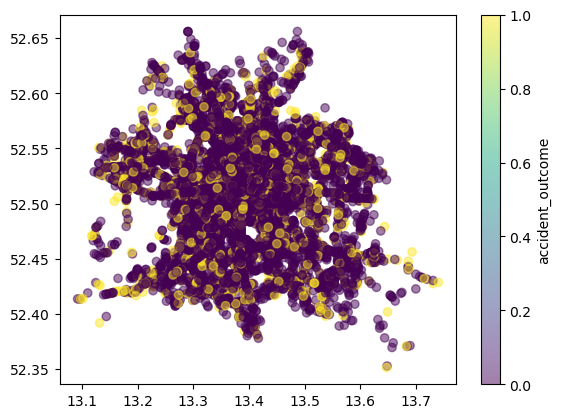

In [30]:
plt.scatter(df_cleaned["LongitudeWGS84"], df_cleaned["LatitudeWGS84"], c=df_cleaned["accident_outcome"], alpha=0.5)
plt.colorbar(label='accident_outcome')

In [31]:
df_serious = df_cleaned[df_cleaned["accident_outcome"] == 1]
df_not_serious = df_cleaned[df_cleaned["accident_outcome"] == 0]

Text(0.5, 1.0, 'Locations of serious accidents')

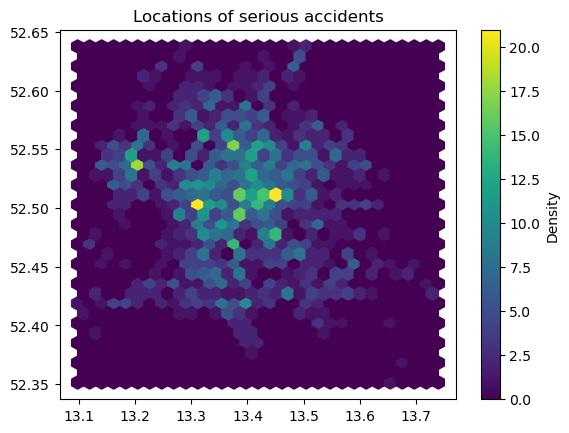

In [32]:
plt.hexbin(df_serious["LongitudeWGS84"], df_serious["LatitudeWGS84"], gridsize=30, cmap='viridis')
plt.colorbar(label='Density')
plt.title('Locations of serious accidents')

Text(0.5, 1.0, 'Locations of non-serious accidents')

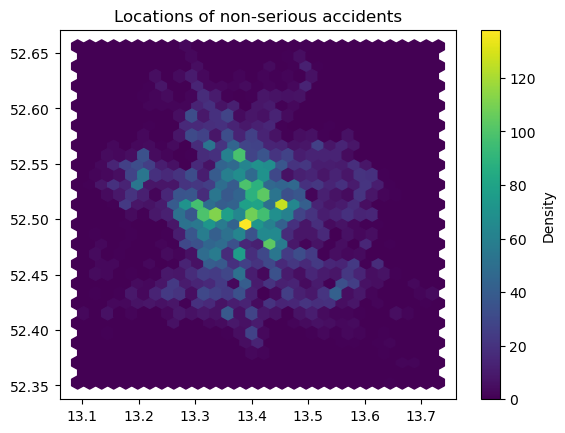

In [33]:
plt.hexbin(df_not_serious["LongitudeWGS84"], df_not_serious["LatitudeWGS84"], gridsize=30, cmap='viridis')
plt.colorbar(label='Density')
plt.title('Locations of non-serious accidents')

In [34]:
df_cleaned.head()

,District,AccidentMonth,AccidentHour,DayOfWeek,AccidentType,AccidentTypeDetail,LightingCondition,InvolvingBike,InvolvingCar,InvolvingPedestrian,InvolvingMotorcycle,InvolvingHGV,InvolvingOther,RoadCondition,GraphicCoord1,GraphicCoord2,LongitudeWGS84,LatitudeWGS84,accident_outcome
0,3,11,18,2,0,3,2,0,1,0,1,0,0,1,800202.0742,5829640.204,13.426895,52.533940,0
1,7,12,19,7,6,2,2,0,1,1,0,0,0,1,798479.5317,5819049.219,13.392090,52.439951,0
2,4,12,17,4,5,2,2,0,1,0,0,0,0,0,793352.6128,5829680.195,13.326242,52.538028,0
3,4,12,15,7,5,2,1,0,1,0,1,0,0,1,792950.0395,5825362.081,13.316521,52.499534,0
4,11,12,9,5,3,6,0,0,1,0,0,0,1,2,807182.0100,5825602.793,13.525752,52.493867,0


Text(0.5, 1.0, 'Accident Count by Time of the Day')

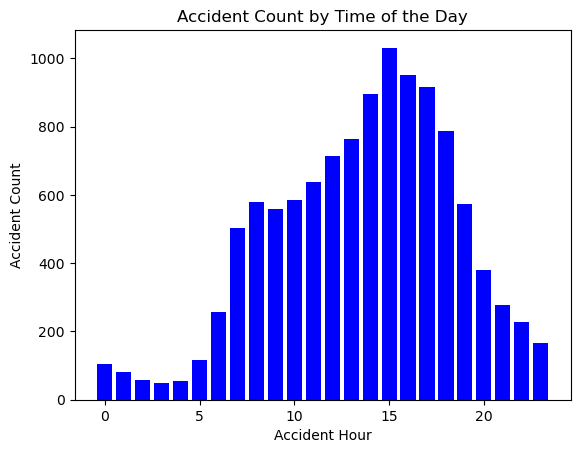

In [35]:
df_viz = df_cleaned.groupby("AccidentHour").count().reset_index()[["AccidentHour", "accident_outcome"]]
plt.bar(df_viz["AccidentHour"], df_viz["accident_outcome"], color='blue')
plt.xlabel('Accident Hour')
plt.ylabel('Accident Count')
plt.title('Accident Count by Time of the Day')

Text(0.5, 1.0, 'Serious Accident Count by Time of the Day')

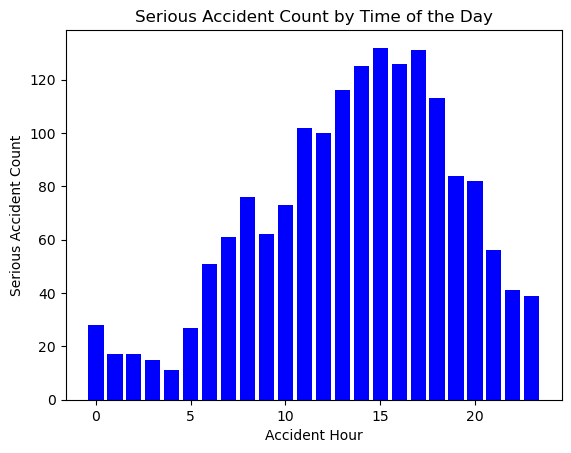

In [36]:
df_viz = df_serious.groupby("AccidentHour").count().reset_index()[["AccidentHour", "accident_outcome"]]
plt.bar(df_viz["AccidentHour"], df_viz["accident_outcome"], color='blue')
plt.xlabel('Accident Hour')
plt.ylabel('Serious Accident Count')
plt.title('Serious Accident Count by Time of the Day')

Text(0.5, 1.0, 'Non-Serious Accident Count by Time of the Day')

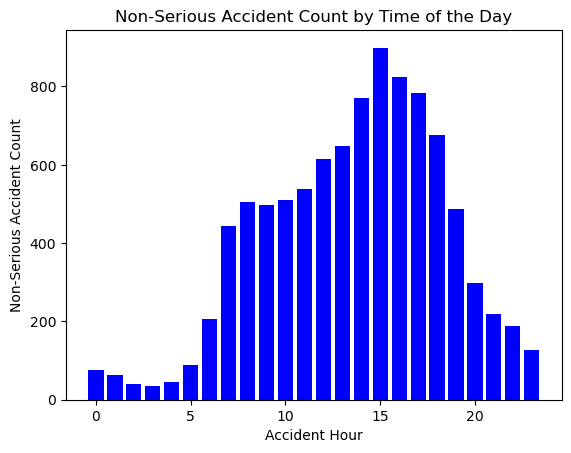

In [37]:
df_viz = df_not_serious.groupby("AccidentHour").count().reset_index()[["AccidentHour", "accident_outcome"]]
plt.bar(df_viz["AccidentHour"], df_viz["accident_outcome"], color='blue')
plt.xlabel('Accident Hour')
plt.ylabel('Non-Serious Accident Count')
plt.title('Non-Serious Accident Count by Time of the Day')

Text(0.5, 1.0, 'Accident Count by Month of the Year')

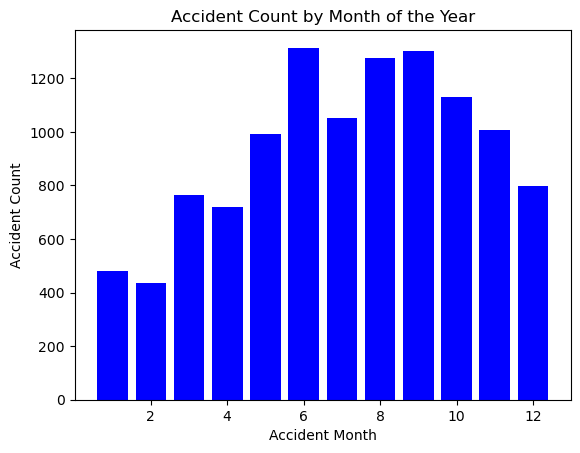

In [38]:
df_viz = df_cleaned.groupby("AccidentMonth").count().reset_index()[["AccidentMonth", "accident_outcome"]]
plt.bar(df_viz["AccidentMonth"], df_viz["accident_outcome"], color='blue')
plt.xlabel('Accident Month')
plt.ylabel('Accident Count')
plt.title('Accident Count by Month of the Year')

Text(0.5, 1.0, 'Serious Accident Count by Month of the Year')

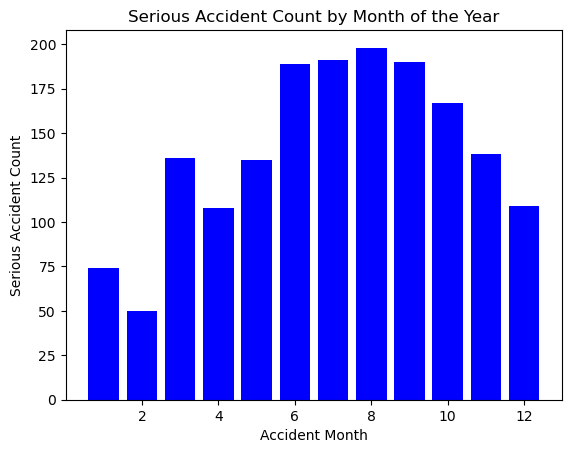

In [39]:
df_viz = df_serious.groupby("AccidentMonth").count().reset_index()[["AccidentMonth", "accident_outcome"]]
plt.bar(df_viz["AccidentMonth"], df_viz["accident_outcome"], color='blue')
plt.xlabel('Accident Month')
plt.ylabel('Serious Accident Count')
plt.title('Serious Accident Count by Month of the Year')

Text(0.5, 1.0, 'Non-Serious Accident Count by Month of the Year')

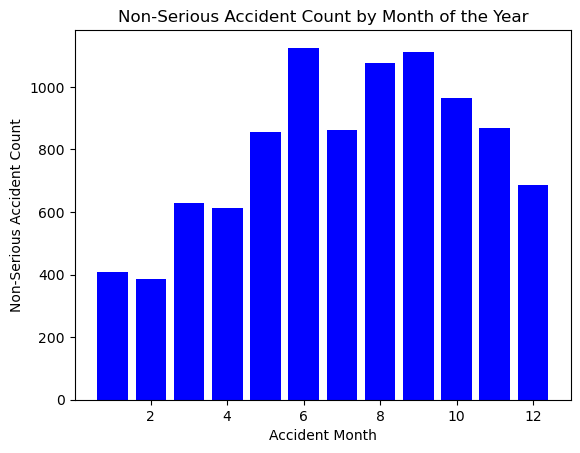

In [40]:
df_viz = df_not_serious.groupby("AccidentMonth").count().reset_index()[["AccidentMonth", "accident_outcome"]]
plt.bar(df_viz["AccidentMonth"], df_viz["accident_outcome"], color='blue')
plt.xlabel('Accident Month')
plt.ylabel('Non-Serious Accident Count')
plt.title('Non-Serious Accident Count by Month of the Year')

Text(0.5, 1.0, 'Accident Count by Day of Week')

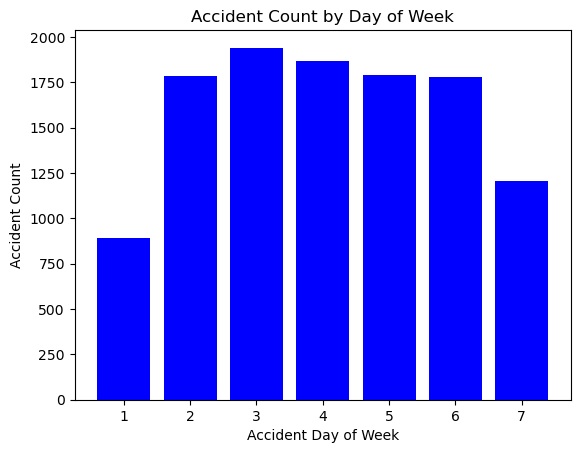

In [41]:
df_viz = df_cleaned.groupby("DayOfWeek").count().reset_index()[["DayOfWeek", "accident_outcome"]]
plt.bar(df_viz["DayOfWeek"], df_viz["accident_outcome"], color='blue')
plt.xlabel('Accident Day of Week')
plt.ylabel('Accident Count')
plt.title('Accident Count by Day of Week')

Text(0.5, 1.0, 'Serious Accident Count by Day of Week')

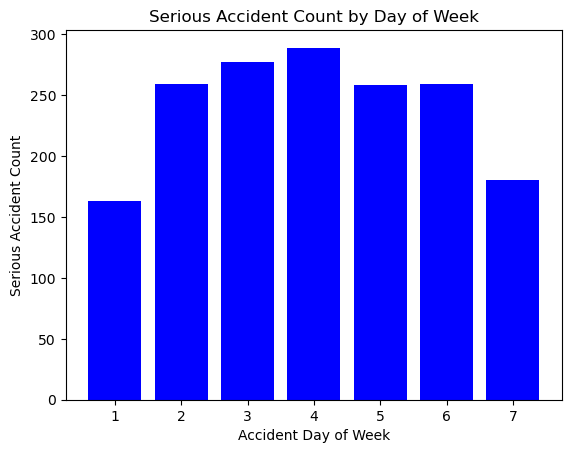

In [42]:
df_viz = df_serious.groupby("DayOfWeek").count().reset_index()[["DayOfWeek", "accident_outcome"]]
plt.bar(df_viz["DayOfWeek"], df_viz["accident_outcome"], color='blue')
plt.xlabel('Accident Day of Week')
plt.ylabel('Serious Accident Count')
plt.title('Serious Accident Count by Day of Week')

Text(0.5, 1.0, 'Non-Serious Accident Count by Day of Week')

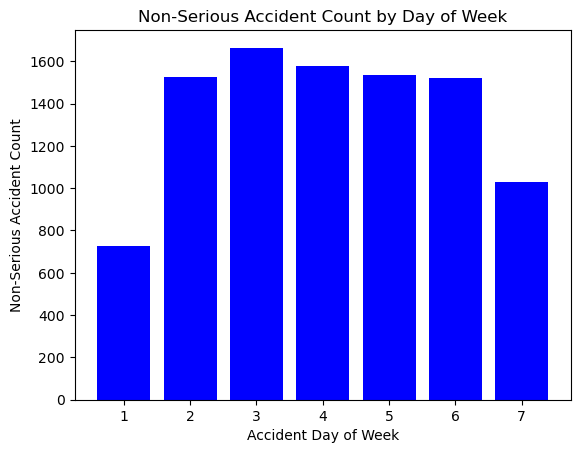

In [43]:
df_viz = df_not_serious.groupby("DayOfWeek").count().reset_index()[["DayOfWeek", "accident_outcome"]]
plt.bar(df_viz["DayOfWeek"], df_viz["accident_outcome"], color='blue')
plt.xlabel('Accident Day of Week')
plt.ylabel('Non-Serious Accident Count')
plt.title('Non-Serious Accident Count by Day of Week')

Text(0.5, 1.0, 'Accident Count by Road Condition')

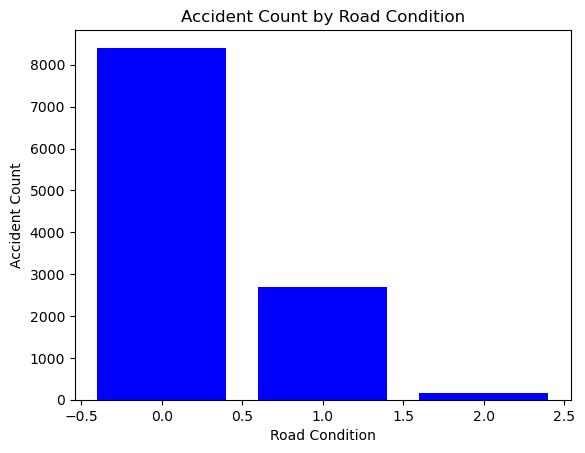

In [44]:
df_viz = df_cleaned.groupby("RoadCondition").count().reset_index()[["RoadCondition", "accident_outcome"]]
plt.bar(df_viz["RoadCondition"], df_viz["accident_outcome"], color='blue')
plt.xlabel('Road Condition')
plt.ylabel('Accident Count')
plt.title('Accident Count by Road Condition')

Text(0.5, 1.0, 'Serious Accident Count by Road Condition')

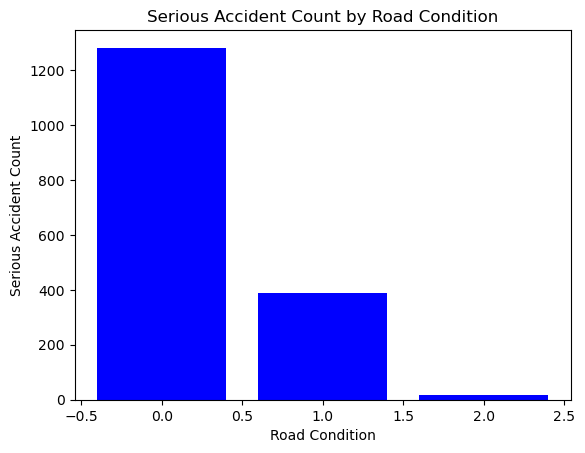

In [45]:
df_viz = df_serious.groupby("RoadCondition").count().reset_index()[["RoadCondition", "accident_outcome"]]
plt.bar(df_viz["RoadCondition"], df_viz["accident_outcome"], color='blue')
plt.xlabel('Road Condition')
plt.ylabel('Serious Accident Count')
plt.title('Serious Accident Count by Road Condition')

Text(0.5, 1.0, 'Non-Serious Accident Count by Road Condition')

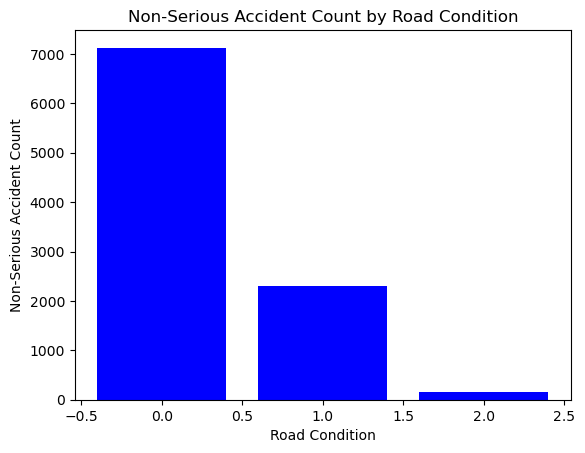

In [46]:
df_viz = df_not_serious.groupby("RoadCondition").count().reset_index()[["RoadCondition", "accident_outcome"]]
plt.bar(df_viz["RoadCondition"], df_viz["accident_outcome"], color='blue')
plt.xlabel('Road Condition')
plt.ylabel('Non-Serious Accident Count')
plt.title('Non-Serious Accident Count by Road Condition')

Text(0.5, 1.0, 'Accident Count by Light Condition')

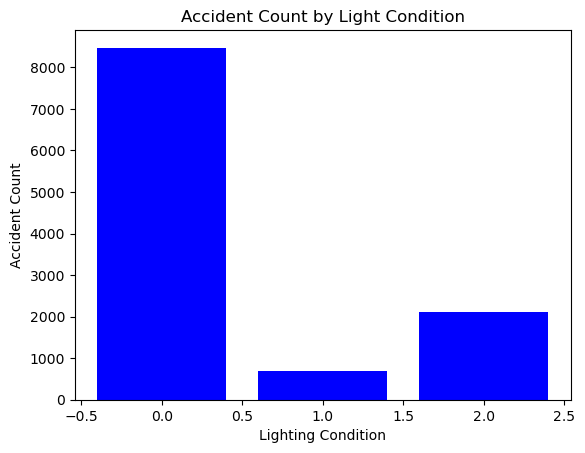

In [47]:
df_viz = df_cleaned.groupby("LightingCondition").count().reset_index()[["LightingCondition", "accident_outcome"]]
plt.bar(df_viz["LightingCondition"], df_viz["accident_outcome"], color='blue')
plt.xlabel('Lighting Condition')
plt.ylabel('Accident Count')
plt.title('Accident Count by Light Condition')

# The vulnerability of pedestrians

In [48]:
df_viz = df_cleaned.groupby(["InvolvingPedestrian", "accident_outcome"]).agg(count=pd.NamedAgg(column="accident_outcome", aggfunc="count")).reset_index()
df_total = df_cleaned.groupby("InvolvingPedestrian").agg(total=pd.NamedAgg(column="accident_outcome", aggfunc="count")).reset_index()
df_viz = df_viz.merge(df_total, how="left", on="InvolvingPedestrian")
df_viz["percentage"] = df_viz["count"]/df_viz["total"]
df_viz.set_index(["InvolvingPedestrian", "accident_outcome"], inplace=True)
df_viz

count  total  percentage
InvolvingPedestrian accident_outcome                          
0                   0                  8456   9807    0.862241
                    1                  1351   9807    0.137759
1                   0                  1126   1460    0.771233
                    1                   334   1460    0.228767

# What are the most common vehicle types that are involved in accidents

In [71]:
df_mode = df_accidents_2021[["ObjectID", "InvolvingBike", "InvolvingCar", "InvolvingPedestrian", "InvolvingMotorcycle", "InvolvingHGV", "InvolvingOther", "accident_outcome"]]
df_mode["sum"] = df_mode[["InvolvingBike", "InvolvingCar", "InvolvingPedestrian", "InvolvingMotorcycle", "InvolvingHGV", "InvolvingOther"]].sum(axis=1)
df_mode["sum"].unique()

/var/folders/64/lts2my7j2q3g96y6cn7715xw0000gn/T/ipykernel_45964/1785145135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mode["sum"] = df_mode[["InvolvingBike", "InvolvingCar", "InvolvingPedestrian", "InvolvingMotorcycle", "InvolvingHGV", "InvolvingOther"]].sum(axis=1)


array([2, 1, 3])

In [72]:
df_test = df_accidents_2021.copy()
df_test["sum"] = df_test[["InvolvingBike", "InvolvingCar", "InvolvingPedestrian", "InvolvingMotorcycle", "InvolvingHGV", "InvolvingOther"]].sum(axis=1)
len(df_test[df_test["sum"] == 3][["InvolvingBike", "InvolvingCar", "InvolvingPedestrian", "InvolvingMotorcycle", "InvolvingHGV", "InvolvingOther", "accident_outcome"]])

85

In [60]:
df_test[df_test["sum"] == 1][["InvolvingBike", "InvolvingCar", "InvolvingPedestrian", "InvolvingMotorcycle", "InvolvingHGV", "InvolvingOther", "accident_outcome"]].sum()

InvolvingBike           567
InvolvingCar           2973
InvolvingPedestrian       0
InvolvingMotorcycle     283
InvolvingHGV              6
InvolvingOther          195
accident_outcome        561
dtype: int64

In [61]:
df_mode.head()

,ObjectID,InvolvingBike,InvolvingCar,InvolvingPedestrian,InvolvingMotorcycle,InvolvingHGV,InvolvingOther,accident_outcome,sum
0,219249,0,1,0,1,0,0,0,2
1,219248,0,1,1,0,0,0,0,2
2,219247,0,1,0,0,0,0,0,1
3,219246,0,1,0,1,0,0,0,2
4,219243,0,1,0,0,0,1,0,2


In [99]:
df_mode_renamed = df_mode[["ObjectID", "InvolvingBike", "InvolvingCar", "InvolvingPedestrian", "InvolvingMotorcycle", "InvolvingHGV", "InvolvingOther"]].rename({
    "InvolvingBike": "bike", 
    "InvolvingCar": "car", 
    "InvolvingPedestrian": "pedestrian", 
    "InvolvingMotorcycle": "motorcycle", 
    "InvolvingHGV": "HGV", 
    "InvolvingOther": "other"
}, axis="columns")
df_long = pd.melt(df_mode_renamed, id_vars="ObjectID", var_name="vehicle_type", value_name="value").sort_values("ObjectID")
df_long = df_long[df_long["value"] == 1]
df_long = df_long.groupby('ObjectID')['vehicle_type'].apply(lambda x: sorted(x)).reset_index(name='vehicle_types')
df_long["vehicle_types"] = df_long["vehicle_types"].apply(lambda x: " + ".join(x))
df_long

,ObjectID,vehicle_types
0,109753,car + other
1,109998,car
2,110370,car
3,111541,car
4,112174,car + pedestrian
...,...,...
11262,219243,car + other
11263,219246,car + motorcycle
11264,219247,car
11265,219248,car + pedestrian


In [116]:
df_types_count = df_long.groupby("vehicle_types").count()
total = sum(df_types_count["ObjectID"]) 
df_types_count.rename({"ObjectID": "count"}, axis="columns", inplace=True)
df_types_count["percentage"] = round((df_types_count["count"]/total)*100, 2)
df_types_count = df_types_count.sort_values("percentage", ascending=False).reset_index()
interested = [type for type in df_types_count["vehicle_types"] if (("car" in type) or ("bike" in type) or ("pedestrian" in type)) and ("motorcycle" not in type) and ("other" not in type) and ("HGV" not in type)]
df_bike_car_ped = df_types_count[df_types_count["vehicle_types"].isin(interested)]
df_bike_car_ped

,vehicle_types,count,percentage
0,car,2973,26.39
1,bike + car,2888,25.63
3,car + pedestrian,928,8.24
5,bike,567,5.03
8,bike + pedestrian,217,1.93
20,bike + car + pedestrian,14,0.12


In [120]:
print(f"{df_bike_car_ped.percentage.sum()}% of all accidents in 2021 inovlves any combinations of bike, car and pedestrians")

67.34% of all accidents in 2021 inovlves any combinations of bike, car and pedestrians


We narrow our focuse down here to only look at accidents involving interactions between bike, car and pedestrians, which accounts for 2/3 of all accidents

In [119]:
df_filtered = df_long[df_long["vehicle_types"].isin(interested)]
df_filtered

,ObjectID,vehicle_types
1,109998,car
2,110370,car
3,111541,car
4,112174,car + pedestrian
5,112177,car + pedestrian
...,...,...
11259,219239,car
11260,219240,car
11261,219241,car
11264,219247,car


In [134]:
df_accidents_filtered = df_filtered.merge(df_accidents_2021, how="left", on="ObjectID")
df_accidents_filtered.drop(["InvolvingMotorcycle", "InvolvingHGV", "InvolvingOther"], axis=1, inplace=True)
for col in df_accidents_filtered.columns: 
    if df_accidents_filtered[col].dtype == "object" and col != "vehicle_types": 
        df_accidents_filtered[col].replace({',': '.'}, regex=True, inplace=True)
        df_accidents_filtered[col] = df_accidents_filtered[col].astype("float64")
df_accidents_filtered

,ObjectID,vehicle_types,State,District,LOR_ab_2021,AccidentYear,AccidentMonth,AccidentHour,DayOfWeek,AccidentCategory,...,LightingCondition,InvolvingBike,InvolvingCar,InvolvingPedestrian,RoadCondition,GraphicCoord1,GraphicCoord2,LongitudeWGS84,LatitudeWGS84,accident_outcome
0,109998,car,11,7,7300619.0,2021,1,14,7,3,...,0,0,1,0,1,796018.2589,5822739.196,13.359259,52.474367,0
1,110370,car,11,3,2400520.0,2021,1,20,1,3,...,2,0,1,0,1,799988.2122,5828912.431,13.423095,52.527534,0
2,111541,car,11,4,4400726.0,2021,1,1,6,3,...,2,0,1,0,0,791154.6790,5824616.757,13.289496,52.493813,0
3,112174,car + pedestrian,11,4,4300414.0,2021,3,16,4,3,...,0,0,1,1,1,791505.4105,5826555.664,13.296345,52.511008,0
4,112177,car + pedestrian,11,4,4300414.0,2021,4,17,1,3,...,0,0,1,1,0,791567.4972,5826545.115,13.297248,52.510880,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7582,219239,car,11,7,7200409.0,2021,12,20,7,2,...,2,0,1,0,2,795262.5800,5824374.901,13.349614,52.489439,1
7583,219240,car,11,10,10200524.0,2021,12,5,1,3,...,2,0,1,0,2,812275.3654,5830609.751,13.605230,52.535845,0
7584,219241,car,11,1,1100308.0,2021,12,22,5,3,...,2,0,1,0,1,796605.7279,5829088.391,13.373538,52.530962,0
7585,219247,car,11,4,4100101.0,2021,12,17,4,3,...,2,0,1,0,0,793352.6128,5829680.195,13.326242,52.538028,0


In [135]:
df_accidents_filtered.shape

(7587, 22)

# Export filtered dataframe for further exploration 

In [136]:
df_accidents_filtered.to_csv("../../data/bike_car_ped_accidents_2021.csv")